In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
from scipy.stats import norm

warnings.filterwarnings('ignore')

In [314]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\rotten_tomatoes_movies.csv")
print('done')

done


In [315]:
df.shape

(17712, 22)

# Data Cleaning and Validation

In [317]:
df.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [318]:
# Dropping unneccesary Columns

df = df.drop(['rotten_tomatoes_link','critics_consensus','movie_info','production_company',
          'tomatometer_status','audience_status','tomatometer_fresh_critics_count',
          'tomatometer_rotten_critics_count','tomatometer_top_critics_count'], axis = 1)

## Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check Data types
- Check the number of unique values of each column
- Checks statistics of dataset

In [320]:
# Missing Values

df.isna().sum()

movie_title                  0
content_rating               0
genres                      19
directors                  194
authors                   1542
actors                     352
original_release_date     1166
streaming_release_date     384
runtime                    314
tomatometer_rating          44
tomatometer_count           44
audience_rating            296
audience_count             297
dtype: int64

In [321]:
# Replacing missing values with mean
df['tomatometer_rating'] = df['tomatometer_rating'].fillna(round(df['tomatometer_rating'].mean()))

In [322]:
# Duplicates
df.duplicated().sum()

0

In [323]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             17712 non-null  object 
 1   content_rating          17712 non-null  object 
 2   genres                  17693 non-null  object 
 3   directors               17518 non-null  object 
 4   authors                 16170 non-null  object 
 5   actors                  17360 non-null  object 
 6   original_release_date   16546 non-null  object 
 7   streaming_release_date  17328 non-null  object 
 8   runtime                 17398 non-null  float64
 9   tomatometer_rating      17712 non-null  float64
 10  tomatometer_count       17668 non-null  float64
 11  audience_rating         17416 non-null  float64
 12  audience_count          17415 non-null  float64
dtypes: float64(5), object(8)
memory usage: 1.8+ MB


In [324]:
# As 'original_release_date' and 'streaming_release_date' are objects
# converting them to datetime objects
df['streaming_release_date'] = pd.to_datetime(df['streaming_release_date'])
df['original_release_date'] = pd.to_datetime(df['original_release_date'])

In [325]:
# Unique Values
df.nunique()

movie_title               17106
content_rating                6
genres                     1106
directors                  8933
authors                   12989
actors                    17330
original_release_date      5804
streaming_release_date     2271
runtime                     190
tomatometer_rating          101
tomatometer_count           407
audience_rating              98
audience_count            11069
dtype: int64

In [326]:
# Statistics
df.describe()

,original_release_date,streaming_release_date,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16546,17328,17398.000000,17712.000000,17668.000000,17416.000000,1.741500e+04
mean,2000-01-27 06:43:23.070228480,2016-02-06 19:49:46.703600896,102.214048,60.885050,57.139801,60.554260,1.439401e+05
min,1914-06-01 00:00:00,1998-07-07 00:00:00,5.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,1993-05-08 18:00:00,2015-09-29 00:00:00,90.000000,38.000000,12.000000,45.000000,7.075000e+02
50%,2006-10-27 00:00:00,2016-08-10 00:00:00,99.000000,67.000000,28.000000,63.000000,4.277000e+03
75%,2013-11-01 00:00:00,2017-03-21 00:00:00,111.000000,86.000000,75.000000,78.000000,2.498800e+04
max,2020-09-30 00:00:00,2020-10-29 00:00:00,266.000000,100.000000,574.000000,100.000000,3.579764e+07
std,NaN,NaN,18.702511,28.407995,68.370047,20.543369,1.763577e+06


# Python Implementation

## Frequency Distribution

In [329]:
# Creating a frequency distribution of tomatometer ratings

min_rating = df["tomatometer_rating"].min()
max_rating = df["tomatometer_rating"].max()
bin_width = 9

bins = np.arange(min_rating, max_rating + bin_width, bin_width)
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Calculating frequency distribution
df["class"] = pd.cut(df["tomatometer_rating"], bins=bins, right=False, labels=labels)
frequency = df["class"].value_counts(sort=False)
cumulative_frequency = frequency.cumsum()

# Preparing the table
midpoints = [(bins[i] + bins[i+1] - 1) / 2 for i in range(len(bins)-1)]
class_boundaries =  [(bins[i] - 0.5, bins[i+1] - 0.5) for i in range(len(bins)-1)]
freq_dist_tomatometer_rating = pd.DataFrame({
    "Class": labels,
    "Midpoint": midpoints,
    "Class Boundaries": class_boundaries,
    "Frequency": frequency.values,
    "Cumulative Frequency": cumulative_frequency.values
})

freq_dist_tomatometer_rating.reset_index(drop=True, inplace=True)
print('Frequency Distribution of Tomatometer Rating(Critics Rating):')
freq_dist_tomatometer_rating


Frequency Distribution of Tomatometer Rating(Critics Rating):


,Class,Midpoint,Class Boundaries,Frequency,Cumulative Frequency
0,0.0-8.0,4.0,"(-0.5, 8.5)",698,698
1,9.0-17.0,13.0,"(8.5, 17.5)",1038,1736
2,18.0-26.0,22.0,"(17.5, 26.5)",1133,2869
3,27.0-35.0,31.0,"(26.5, 35.5)",1137,4006
4,36.0-44.0,40.0,"(35.5, 44.5)",1381,5387
5,45.0-53.0,49.0,"(44.5, 53.5)",1307,6694
6,54.0-62.0,58.0,"(53.5, 62.5)",1479,8173
7,63.0-71.0,67.0,"(62.5, 71.5)",1803,9976
8,72.0-80.0,76.0,"(71.5, 80.5)",1945,11921
9,81.0-89.0,85.0,"(80.5, 89.5)",2552,14473


## Graphical Representation of Data

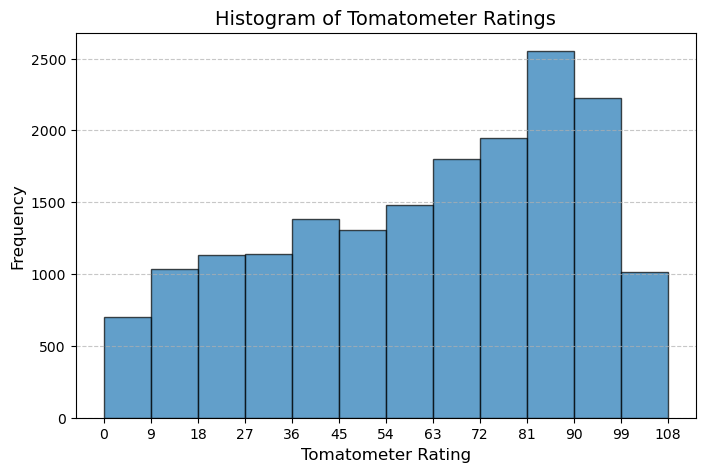

In [331]:
# Histogram 

plt.figure(figsize=(8, 5))
plt.hist(df["tomatometer_rating"], bins=bins, edgecolor="black", alpha=0.7)
plt.xticks(bins)
plt.title("Histogram of Tomatometer Ratings", fontsize=14)
plt.xlabel("Tomatometer Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


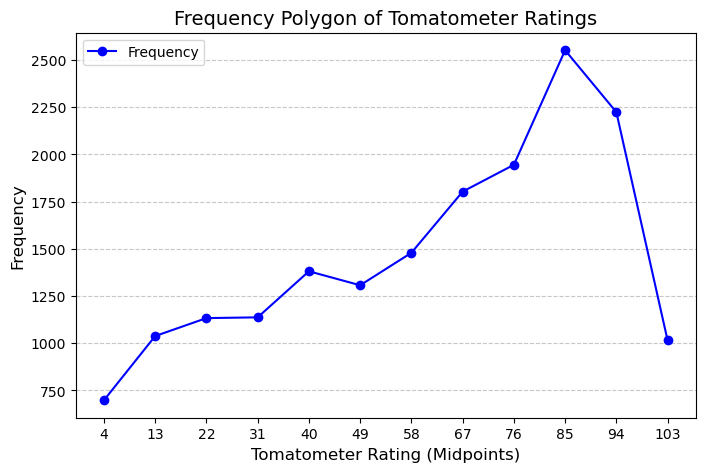

In [332]:
# Creating a frequency polygon

plt.figure(figsize=(8, 5))
plt.plot(midpoints, frequency.values, marker="o", linestyle="-", color="blue", label="Frequency")
plt.title("Frequency Polygon of Tomatometer Ratings", fontsize=14)
plt.xlabel("Tomatometer Rating (Midpoints)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(midpoints)
plt.legend()
plt.show()

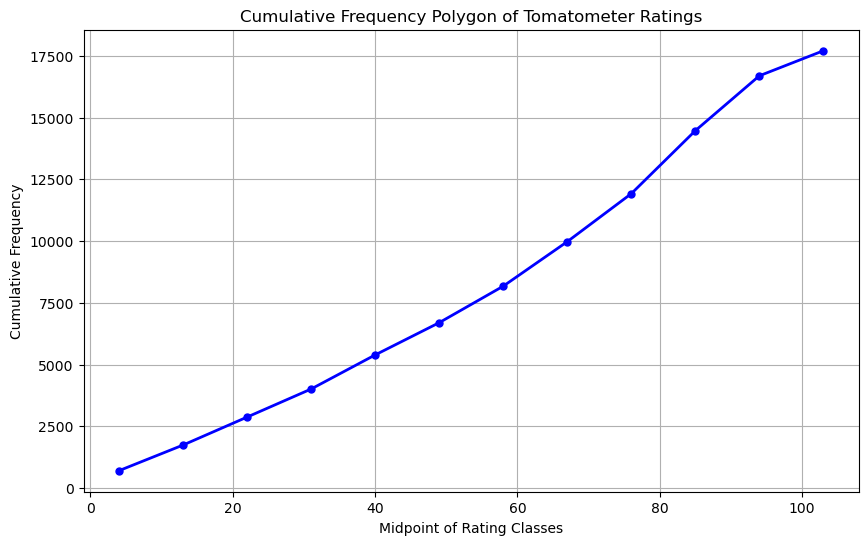

In [333]:
# Cummulative Frequency Polygon

midpoints = freq_dist_tomatometer_rating["Midpoint"]
cumulative_frequency = freq_dist_tomatometer_rating["Cumulative Frequency"]

plt.figure(figsize=(10, 6))
plt.plot(midpoints, cumulative_frequency, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)

plt.title('Cumulative Frequency Polygon of Tomatometer Ratings')
plt.xlabel('Midpoint of Rating Classes')
plt.ylabel('Cumulative Frequency')
    
plt.grid(True)

plt.show()


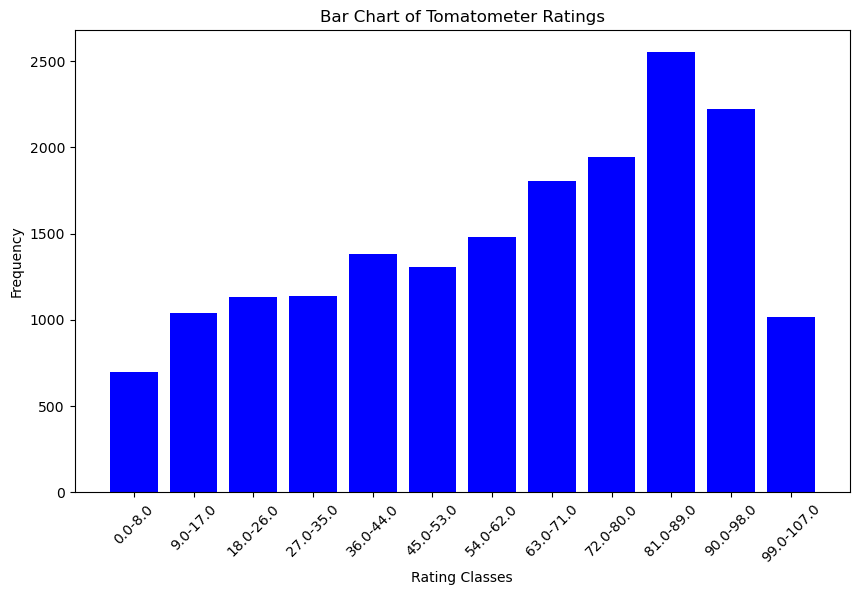

In [334]:
# Bar Chart

labels = freq_dist_tomatometer_rating["Class"]
frequency = freq_dist_tomatometer_rating["Frequency"]

plt.figure(figsize=(10, 6))
plt.bar(labels, frequency, color='b')
plt.title('Bar Chart of Tomatometer Ratings')
plt.xlabel('Rating Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


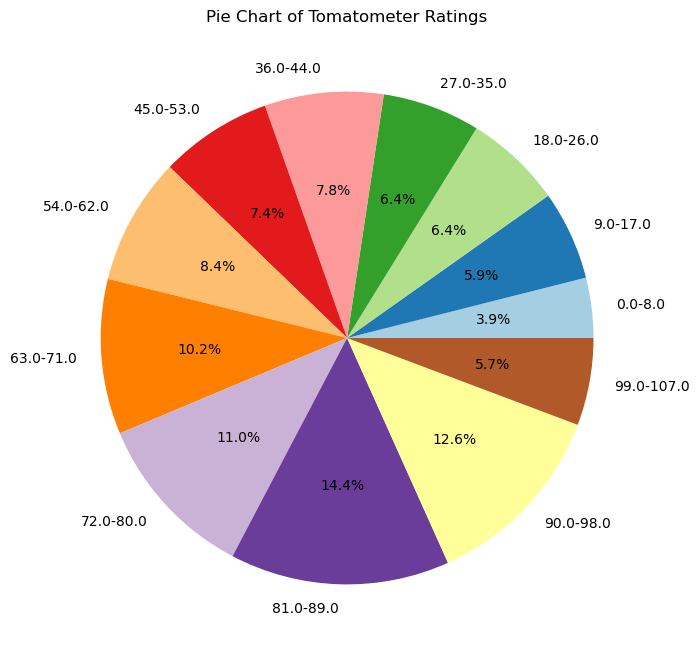

In [335]:
# Pie Chart

plt.figure(figsize=(8, 8))
plt.pie(frequency, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Tomatometer Ratings')
plt.show()


## Measures of Central Tendency

In [337]:
# Aritmetic mean

mean_ungrouped = df["tomatometer_rating"].mean()
print(f'Arithmetic Mean (Ungrouped): {mean_ungrouped}')

mean_grouped = (midpoints * frequency).sum() / frequency.sum()
print(f'Arithmetic Mean (Grouped): {mean_grouped}')


Arithmetic Mean (Ungrouped): 60.885049683830175
Arithmetic Mean (Grouped): 61.01321138211382


In [338]:
# Geometric mean

mean_ungrouped_geometric = np.exp(np.log(df["tomatometer_rating"]).mean())
print(f'Geometric Mean (Ungrouped): {mean_ungrouped_geometric}')

mean_grouped_geometric = np.exp(np.sum(frequency * np.log(midpoints)) / frequency.sum())
print(f'Geometric Mean (Grouped): {mean_grouped_geometric}')


Geometric Mean (Ungrouped): 0.0
Geometric Mean (Grouped): 50.237014113613135


In [339]:
# Harmonic mean

mean_ungrouped_harmonic = len(df["tomatometer_rating"]) / (1 / df["tomatometer_rating"]).mean()
print(f'Harmonic Mean (Ungrouped): {mean_ungrouped_harmonic}')

mean_grouped_harmonic = frequency.sum() / (frequency / midpoints).sum()
print(f'Harmonic Mean (Grouped): {mean_grouped_harmonic}')


Harmonic Mean (Ungrouped): 0.0
Harmonic Mean (Grouped): 32.48346258737901


In [340]:
# Median

median_ungrouped = df["tomatometer_rating"].median()
print(f'Median (Ungrouped): {median_ungrouped}')

cumulative_frequency = freq_dist_tomatometer_rating["Cumulative Frequency"]
total_frequency = cumulative_frequency.iloc[-1]
median_class_index = cumulative_frequency[cumulative_frequency >= total_frequency / 2].index[0]

median_class = freq_dist_tomatometer_rating.iloc[median_class_index]
L = median_class["Midpoint"] - (median_class["Class Boundaries"][0] - median_class["Midpoint"])
f = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
h = median_class["Midpoint"] - L
median_grouped = L + (total_frequency / 2 - f) * h / (median_class["Frequency"])

print(f'Median (Grouped): {median_grouped}')


Median (Ungrouped): 67.0
Median (Grouped): 69.79534109816971


In [341]:
# Mode

mode_ungrouped = df["tomatometer_rating"].mode()[0]
print(f'Mode (Ungrouped): {mode_ungrouped}')

# Identify the modal class (the class with the highest frequency)
modal_class_index = freq_dist_tomatometer_rating["Frequency"].idxmax()
modal_class = freq_dist_tomatometer_rating.iloc[modal_class_index]

L = modal_class["Midpoint"] - (modal_class["Class Boundaries"][0] - modal_class["Midpoint"])
f1 = modal_class["Frequency"]
f0 = freq_dist_tomatometer_rating.iloc[modal_class_index - 1]["Frequency"] if modal_class_index > 0 else 0
f2 = freq_dist_tomatometer_rating.iloc[modal_class_index + 1]["Frequency"] if modal_class_index + 1 < len(freq_dist_tomatometer_rating) else 0
h = modal_class["Midpoint"] - L

mode_grouped = L + ((f1 - f0) / (2 * f1 - f0 - f2)) * h
print(f'Mode (Grouped): {mode_grouped}')


Mode (Ungrouped): 100.0
Mode (Grouped): 86.57860962566845


## Quantiles

In [343]:
# Quartiles

Q1_ungrouped = df["tomatometer_rating"].quantile(0.25)
Q3_ungrouped = df["tomatometer_rating"].quantile(0.75)

print(f'Q1 (Ungrouped): {Q1_ungrouped}')
print(f'Q3 (Ungrouped): {Q3_ungrouped}')

total_frequency = freq_dist_tomatometer_rating["Frequency"].sum()

# Q1
Q1_class_index = freq_dist_tomatometer_rating["Cumulative Frequency"].searchsorted(total_frequency * 0.25)
Q1_class = freq_dist_tomatometer_rating.iloc[Q1_class_index]

L_Q1 = Q1_class["Midpoint"] - (Q1_class["Class Boundaries"][0] - Q1_class["Midpoint"])
F_Q1 = freq_dist_tomatometer_rating["Cumulative Frequency"].iloc[Q1_class_index - 1] if Q1_class_index > 0 else 0
f_Q1 = Q1_class["Frequency"]
h_Q1 = Q1_class["Midpoint"] - L_Q1

Q1_grouped = L_Q1 + ((total_frequency * 0.25 - F_Q1) / f_Q1) * h_Q1

# Q3
Q3_class_index = freq_dist_tomatometer_rating["Cumulative Frequency"].searchsorted(total_frequency * 0.75)
Q3_class = freq_dist_tomatometer_rating.iloc[Q3_class_index]

L_Q3 = Q3_class["Midpoint"] - (Q3_class["Class Boundaries"][0] - Q3_class["Midpoint"])
F_Q3 = freq_dist_tomatometer_rating["Cumulative Frequency"].iloc[Q3_class_index - 1] if Q3_class_index > 0 else 0
f_Q3 = Q3_class["Frequency"]
h_Q3 = Q3_class["Midpoint"] - L_Q3

Q3_grouped = L_Q3 + ((total_frequency * 0.75 - F_Q3) / f_Q3) * h_Q3

print(f'\nQ1 (Grouped): {Q1_grouped}')
print(f'Q3 (Grouped): {Q3_grouped}')


Q1 (Ungrouped): 38.0
Q3 (Ungrouped): 86.0

Q1 (Grouped): 43.1249094858798
Q3 (Grouped): 87.0965909090909


In [344]:
# Deciles

D2_ungrouped = df["tomatometer_rating"].quantile(0.20)
D4_ungrouped = df["tomatometer_rating"].quantile(0.40)
D6_ungrouped = df["tomatometer_rating"].quantile(0.60)
D8_ungrouped = df["tomatometer_rating"].quantile(0.80)

print(f'D2 (Ungrouped): {D2_ungrouped}')
print(f'D4 (Ungrouped): {D4_ungrouped}')
print(f'D6 (Ungrouped): {D6_ungrouped}')
print(f'D8 (Ungrouped): {D8_ungrouped}\n')

total_frequency = freq_dist_tomatometer_rating["Frequency"].sum()

deciles = [2, 4, 6, 8]
for k in deciles:
    decile_class_index = freq_dist_tomatometer_rating["Cumulative Frequency"].searchsorted(total_frequency * k / 10)
    decile_class = freq_dist_tomatometer_rating.iloc[decile_class_index]
    
    L = decile_class["Midpoint"] - (decile_class["Class Boundaries"][0] - decile_class["Midpoint"])
    F = freq_dist_tomatometer_rating["Cumulative Frequency"].iloc[decile_class_index - 1] if decile_class_index > 0 else 0
    f = decile_class["Frequency"]
    h = decile_class["Midpoint"] - L
    
    decile_value = L + ((total_frequency * k / 10 - F) / f) * h
    print(f'D{k} (Grouped): {decile_value}')


D2 (Ungrouped): 32.0
D4 (Ungrouped): 56.0
D6 (Ungrouped): 75.0
D8 (Ungrouped): 88.0

D2 (Grouped): 32.83482849604221
D4 (Grouped): 61.31095334685598
D6 (Grouped): 78.99336760925449
D8 (Grouped): 85.5349921630094


In [345]:
# Percentiles

P10_ungrouped = df["tomatometer_rating"].quantile(0.10)
P25_ungrouped = df["tomatometer_rating"].quantile(0.25)
P50_ungrouped = df["tomatometer_rating"].quantile(0.50)
P75_ungrouped = df["tomatometer_rating"].quantile(0.75)
P90_ungrouped = df["tomatometer_rating"].quantile(0.90)

print(f'P10 (Ungrouped): {P10_ungrouped}')
print(f'P25 (Ungrouped): {P25_ungrouped}')
print(f'P50 (Ungrouped): {P50_ungrouped}')
print(f'P75 (Ungrouped): {P75_ungrouped}')
print(f'P90 (Ungrouped): {P90_ungrouped}\n')

total_frequency = freq_dist_tomatometer_rating["Frequency"].sum()

percentiles = [10, 25, 50, 75, 90]
for k in percentiles:
    percentile_class_index = freq_dist_tomatometer_rating["Cumulative Frequency"].searchsorted(total_frequency * k / 100)
    percentile_class = freq_dist_tomatometer_rating.iloc[percentile_class_index]
    
    L = percentile_class["Midpoint"] - (percentile_class["Class Boundaries"][0] - percentile_class["Midpoint"])
    F = freq_dist_tomatometer_rating["Cumulative Frequency"].iloc[percentile_class_index - 1] if percentile_class_index > 0 else 0
    f = percentile_class["Frequency"]
    h = percentile_class["Midpoint"] - L
    
    percentile_value = L + ((total_frequency * k / 100 - F) / f) * h
    print(f'P{k} (Grouped): {percentile_value}')


P10 (Ungrouped): 18.0
P25 (Ungrouped): 38.0
P50 (Ungrouped): 67.0
P75 (Ungrouped): 86.0
P90 (Ungrouped): 95.0

P10 (Grouped): 26.360194174757282
P25 (Grouped): 43.1249094858798
P50 (Grouped): 69.79534109816971
P75 (Grouped): 87.0965909090909
P90 (Grouped): 95.5300809352518


## Measures of Dispersion

In [347]:
# Range

range_ungrouped = df["tomatometer_rating"].max() - df["tomatometer_rating"].min()
print(f'Range (Ungrouped): {range_ungrouped}')

max_class_boundary = freq_dist_tomatometer_rating["Class Boundaries"].iloc[-1][1]
min_class_boundary = freq_dist_tomatometer_rating["Class Boundaries"].iloc[0][0]

range_grouped = max_class_boundary - min_class_boundary
print(f'Range (Grouped): {range_grouped}')


Range (Ungrouped): 100.0
Range (Grouped): 108.0


In [348]:
# Coefficient of Range

max_value_ungrouped = df["tomatometer_rating"].max()
min_value_ungrouped = df["tomatometer_rating"].min()

coefficient_of_range_ungrouped = (max_value_ungrouped - min_value_ungrouped) / (max_value_ungrouped + min_value_ungrouped)
print(f'Coefficient of Range (Ungrouped): {coefficient_of_range_ungrouped}')

coefficient_of_range_grouped = (max_class_boundary - min_class_boundary) / (max_class_boundary + min_class_boundary)
print(f'Coefficient of Range (Grouped): {coefficient_of_range_grouped}')


Coefficient of Range (Ungrouped): 1.0
Coefficient of Range (Grouped): 1.0093457943925233


In [349]:
# Quartile Deviation

quartile_deviation_ungrouped = (Q3_ungrouped - Q1_ungrouped) / 2
print(f'Quartile Deviation (Ungrouped): {quartile_deviation_ungrouped}')

quartile_deviation_grouped = (Q3_grouped - Q1_grouped) / 2
print(f'Quartile Deviation (Grouped): {quartile_deviation_grouped}')


Quartile Deviation (Ungrouped): 24.0
Quartile Deviation (Grouped): 21.985840711605555


In [350]:
# Coefficient of Quartile Deviation

coefficient_of_quartile_deviation_ungrouped = (Q3_ungrouped - Q1_ungrouped) / (Q3_ungrouped + Q1_ungrouped)
print(f'Coefficient of Quartile Deviation (Ungrouped): {coefficient_of_quartile_deviation_ungrouped}')

quartile_deviation_grouped = (Q3_grouped - Q1_grouped) / 2
print(f'Quartile Deviation (Grouped): {quartile_deviation_grouped}')


Coefficient of Quartile Deviation (Ungrouped): 0.3870967741935484
Quartile Deviation (Grouped): 21.985840711605555


In [351]:
# Mean Deviation

mean_ungrouped = df["tomatometer_rating"].mean()
mean_deviation_ungrouped = (df["tomatometer_rating"].apply(lambda x: abs(x - mean_ungrouped))).mean()
print(f'Mean Deviation (Ungrouped): {mean_deviation_ungrouped}')

mean_deviation_grouped = (freq_dist_tomatometer_rating["Frequency"] * abs(freq_dist_tomatometer_rating["Midpoint"] - mean_grouped)).sum() / freq_dist_tomatometer_rating["Frequency"].sum()
print(f'Mean Deviation (Grouped): {mean_deviation_grouped}')


Mean Deviation (Ungrouped): 24.391181849469053
Mean Deviation (Grouped): 24.518628796975637


In [352]:
# Coefficient of Mean Deviation

coefficient_of_mean_deviation_ungrouped = mean_deviation_ungrouped / mean_ungrouped
print(f'Coefficient of Mean Deviation (Ungrouped): {coefficient_of_mean_deviation_ungrouped}')

coefficient_of_mean_deviation_grouped = mean_deviation_grouped / mean_grouped
print(f'Coefficient of Mean Deviation (Grouped): {coefficient_of_mean_deviation_grouped}')


Coefficient of Mean Deviation (Ungrouped): 0.40061036290731405
Coefficient of Mean Deviation (Grouped): 0.4018577000220535


In [353]:
# Variance

variance_ungrouped = ((df["tomatometer_rating"] - mean_ungrouped)**2).mean()
print(f'Variance (Ungrouped): {variance_ungrouped}')

variance_grouped = (freq_dist_tomatometer_rating["Frequency"] * (freq_dist_tomatometer_rating["Midpoint"] - mean_grouped)**2).sum() / freq_dist_tomatometer_rating["Frequency"].sum()
print(f'Variance (Grouped): {variance_grouped}')


Variance (Ungrouped): 806.9686066596814
Variance (Grouped): 813.0851913130412


In [354]:
#  Coefficient of Variation

coefficient_of_variation_ungrouped = (std_dev_ungrouped / mean_ungrouped) * 100
print(f'Coefficient of Variation (Ungrouped): {coefficient_of_variation_ungrouped}%')

coefficient_of_variation_grouped = (std_dev_grouped / mean_grouped) * 100
print(f'Coefficient of Variation (Grouped): {coefficient_of_variation_grouped}%')


Coefficient of Variation (Ungrouped): 46.657090724022495%
Coefficient of Variation (Grouped): 46.73520384945519%


In [355]:
# Standard Deviation

std_dev_ungrouped = variance_ungrouped**0.5
print(f'Standard Deviation (Ungrouped): {std_dev_ungrouped}')

std_dev_grouped = variance_grouped**0.5
print(f'Standard Deviation (Grouped): {std_dev_grouped}')


Standard Deviation (Ungrouped): 28.407192868350815
Standard Deviation (Grouped): 28.51464871452989


In [356]:
# Coefficient of Standard Deviation

coefficient_of_standard_deviation_ungrouped = (std_dev_ungrouped / mean_ungrouped)
print(f'Coefficient of Standard Deviation (Ungrouped): {coefficient_of_standard_deviation_ungrouped}')

coefficient_of_standard_deviation_grouped = (std_dev_grouped / mean_grouped)
print(f'Coefficient of Standard Deviation (Grouped): {coefficient_of_standard_deviation_grouped}')


Coefficient of Standard Deviation (Ungrouped): 0.46657090724022493
Coefficient of Standard Deviation (Grouped): 0.46735203849455187


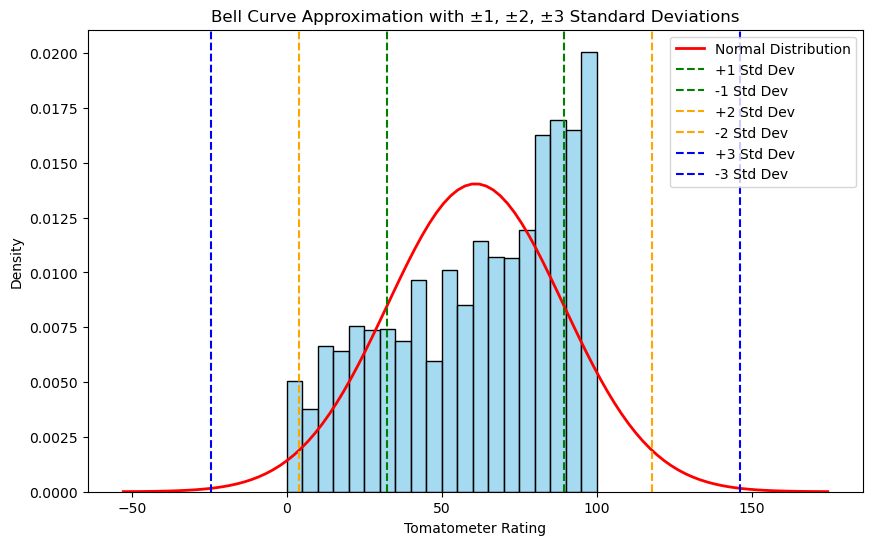

In [357]:
# Bell Curve Approximation

mean = df["tomatometer_rating"].mean()
std_dev = df["tomatometer_rating"].std()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["tomatometer_rating"], kde=False, bins=20, color="skyblue", stat="density")

# Plot the normal distribution curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = norm.pdf(x, mean, std_dev)
plt.plot(x, y, color="red", label="Normal Distribution", lw=2)

# Mark ±1, ±2, ±3 standard deviations
plt.axvline(mean + std_dev, color='green', linestyle='dashed', label='+1 Std Dev')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', label='-1 Std Dev')
plt.axvline(mean + 2*std_dev, color='orange', linestyle='dashed', label='+2 Std Dev')
plt.axvline(mean - 2*std_dev, color='orange', linestyle='dashed', label='-2 Std Dev')
plt.axvline(mean + 3*std_dev, color='blue', linestyle='dashed', label='+3 Std Dev')
plt.axvline(mean - 3*std_dev, color='blue', linestyle='dashed', label='-3 Std Dev')

# Title and labels
plt.title("Bell Curve Approximation with ±1, ±2, ±3 Standard Deviations")
plt.xlabel("Tomatometer Rating")
plt.ylabel("Density")

# Show legend
plt.legend()

# Display the plot
plt.show()


## Measure of Kurtosis and Skewness

In [359]:
#  Karl Pearson’s Method

skewness_ungrouped = 3 * (mean_ungrouped - median_ungrouped) / std_dev_ungrouped
print(f'Karl Pearson\'s Coefficient of Skewness (Ungrouped): {skewness_ungrouped}')

skewness_grouped = 3 * (mean_grouped - median_grouped) / std_dev_grouped
print(f'Karl Pearson\'s Coefficient of Skewness (Grouped): {skewness_grouped}')


Karl Pearson's Coefficient of Skewness (Ungrouped): -0.6457818987439602
Karl Pearson's Coefficient of Skewness (Grouped): -0.923959800870443


In [360]:
# Bowleys Method

bowley_skewness_ungrouped = (Q3_ungrouped + Q1_ungrouped - 2 * median_ungrouped) / (Q3_ungrouped - Q1_ungrouped)
print(f'Bowley\'s Coefficient of Skewness (Ungrouped): {bowley_skewness_ungrouped}')

bowley_skewness_grouped = (Q3_grouped + Q1_grouped - 2 * median_grouped) / (Q3_grouped - Q1_grouped)
print(f'Bowley\'s Coefficient of Skewness (Grouped): {bowley_skewness_grouped}')


Bowley's Coefficient of Skewness (Ungrouped): -0.20833333333333334
Bowley's Coefficient of Skewness (Grouped): -0.21307308472454903


In [361]:
# Moments about Mean
mean_ungrouped = df["tomatometer_rating"].mean()

first_moment_ungrouped = 0

second_moment_ungrouped = ((df["tomatometer_rating"] - mean_ungrouped)**2).mean()

third_moment_ungrouped = ((df["tomatometer_rating"] - mean_ungrouped)**3).mean()

fourth_moment_ungrouped = ((df["tomatometer_rating"] - mean_ungrouped)**4).mean()

print(f'First Moment about the Mean: {first_moment_ungrouped}')
print(f'Second Moment (Variance): {second_moment_ungrouped}')
print(f'Third Moment (Skewness): {third_moment_ungrouped}')
print(f'Fourth Moment (Kurtosis): {fourth_moment_ungrouped}\n')


mean_grouped = (freq_dist_tomatometer_rating["Midpoint"] * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

first_moment_grouped = 0

second_moment_grouped = ((freq_dist_tomatometer_rating["Midpoint"] - mean_grouped)**2 * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

third_moment_grouped = ((freq_dist_tomatometer_rating["Midpoint"] - mean_grouped)**3 * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

fourth_moment_grouped = ((freq_dist_tomatometer_rating["Midpoint"] - mean_grouped)**4 * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

print(f'First Moment about the Mean: {first_moment_grouped}')
print(f'Second Moment (Variance): {second_moment_grouped}')
print(f'Third Moment (Skewness): {third_moment_grouped}')
print(f'Fourth Moment (Kurtosis): {fourth_moment_grouped}')


First Moment about the Mean: 0
Second Moment (Variance): 806.9686066596814
Third Moment (Skewness): -10124.340043342578
Fourth Moment (Kurtosis): 1323656.713278952

First Moment about the Mean: 0
Second Moment (Variance): 813.0851913130412
Third Moment (Skewness): -9048.634476351874
Fourth Moment (Kurtosis): 1324973.5783723234


In [362]:
# Moments about Arbitrary Origin

# Choose an arbitrary origin c 
c = 60  

first_moment_arbitrary_ungrouped = ((df["tomatometer_rating"] - c)**1).mean()

second_moment_arbitrary_ungrouped = ((df["tomatometer_rating"] - c)**2).mean()

third_moment_arbitrary_ungrouped = ((df["tomatometer_rating"] - c)**3).mean()

fourth_moment_arbitrary_ungrouped = ((df["tomatometer_rating"] - c)**4).mean()

print(f'First Moment about Arbitrary Origin (ungrouped): {first_moment_arbitrary_ungrouped}')
print(f'Second Moment about Arbitrary Origin (ungrouped): {second_moment_arbitrary_ungrouped}')
print(f'Third Moment about Arbitrary Origin (ungrouped): {third_moment_arbitrary_ungrouped}')
print(f'Fourth Moment about Arbitrary Origin (ungrouped): {fourth_moment_arbitrary_ungrouped}\n')


first_moment_arbitrary_grouped = ((freq_dist_tomatometer_rating["Midpoint"] - c)**1 * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

second_moment_arbitrary_grouped = ((freq_dist_tomatometer_rating["Midpoint"] - c)**2 * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

third_moment_arbitrary_grouped = ((freq_dist_tomatometer_rating["Midpoint"] - c)**3 * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

fourth_moment_arbitrary_grouped = ((freq_dist_tomatometer_rating["Midpoint"] - c)**4 * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

print(f'First Moment about Arbitrary Origin (grouped): {first_moment_arbitrary_grouped}')
print(f'Second Moment about Arbitrary Origin (grouped): {second_moment_arbitrary_grouped}')
print(f'Third Moment about Arbitrary Origin (grouped): {third_moment_arbitrary_grouped}')
print(f'Fourth Moment about Arbitrary Origin (grouped): {fourth_moment_arbitrary_grouped}')


First Moment about Arbitrary Origin (ungrouped): 0.8850496838301717
Second Moment about Arbitrary Origin (ungrouped): 807.7519196025294
Third Moment about Arbitrary Origin (ungrouped): -7981.024841915086
Fourth Moment about Arbitrary Origin (ungrouped): 1291607.804765131

First Moment about Arbitrary Origin (grouped): 1.0132113821138211
Second Moment about Arbitrary Origin (grouped): 814.1117886178862
Third Moment about Arbitrary Origin (grouped): -6576.112804878048
Fourth Moment about Arbitrary Origin (grouped): 1293310.180894309


In [363]:
# Moments about Origin

first_moment_origin_ungrouped = df["tomatometer_rating"].mean()

second_moment_origin_ungrouped = (df["tomatometer_rating"]**2).mean()

third_moment_origin_ungrouped = (df["tomatometer_rating"]**3).mean()

fourth_moment_origin_ungrouped = (df["tomatometer_rating"]**4).mean()

print(f'First Moment about the Origin(ungrouped): {first_moment_origin_ungrouped}')
print(f'Second Moment about the Origin(ungrouped): {second_moment_origin_ungrouped}')
print(f'Third Moment about the Origin(ungrouped): {third_moment_origin_ungrouped}')
print(f'Fourth Moment about the Origin(ungrouped): {fourth_moment_origin_ungrouped}\n')

first_moment_origin_grouped = (freq_dist_tomatometer_rating["Midpoint"] * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

second_moment_origin_grouped = ((freq_dist_tomatometer_rating["Midpoint"]**2) * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

third_moment_origin_grouped = ((freq_dist_tomatometer_rating["Midpoint"]**3) * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

fourth_moment_origin_grouped = ((freq_dist_tomatometer_rating["Midpoint"]**4) * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

print(f'First Moment about the Origin(grouped): {first_moment_origin_grouped}')
print(f'Second Moment about the Origin(grouped): {second_moment_origin_grouped}')
print(f'Third Moment about the Origin(grouped): {third_moment_origin_grouped}')
print(f'Fourth Moment about the Origin(grouped): {fourth_moment_origin_grouped}')


First Moment about the Origin(ungrouped): 60.885049683830175
Second Moment about the Origin(ungrouped): 4513.95788166215
Third Moment about the Origin(ungrouped): 362972.85727190605
Fourth Moment about the Origin(ungrouped): 30548286.232949413

First Moment about the Origin(grouped): 61.01321138211382
Second Moment about the Origin(grouped): 4535.697154471544
Third Moment about the Origin(grouped): 366906.69207317074
Fourth Moment about the Origin(grouped): 31135272.37601626


In [364]:
# Moment Ratios

M1 = df["tomatometer_rating"].mean()  
M2 = (df["tomatometer_rating"]**2).mean()  
M3 = (df["tomatometer_rating"]**3).mean()  
M4 = (df["tomatometer_rating"]**4).mean()  

b1 = M3 / (M2**(3/2))

b2 = M4 / (M2**2)

print(f'Moment Ratio for Skewness (b1)(ungrouped): {b1}')
print(f'Moment Ratio for Kurtosis (b2(ungrouped)): {b2}\n')


M1_grouped = (freq_dist_tomatometer_rating["Midpoint"] * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()
M2_grouped = ((freq_dist_tomatometer_rating["Midpoint"]**2) * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()
M3_grouped = ((freq_dist_tomatometer_rating["Midpoint"]**3) * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()
M4_grouped = ((freq_dist_tomatometer_rating["Midpoint"]**4) * freq_dist_tomatometer_rating["Frequency"]).sum() / freq_dist_tomatometer_rating["Frequency"].sum()

b1_grouped = M3_grouped / (M2_grouped**(3/2))

b2_grouped = M4_grouped / (M2_grouped**2)

# Print the results
print(f'Moment Ratio for Skewness (b1(grouped)): {b1_grouped}')
print(f'Moment Ratio for Kurtosis (b2)(grouped): {b2_grouped}')


Moment Ratio for Skewness (b1)(ungrouped): 1.1968449631363627
Moment Ratio for Kurtosis (b2(ungrouped)): 1.4992423663737375

Moment Ratio for Skewness (b1(grouped)): 1.2011287410612213
Moment Ratio for Kurtosis (b2)(grouped): 1.5134377788933044


# Insights

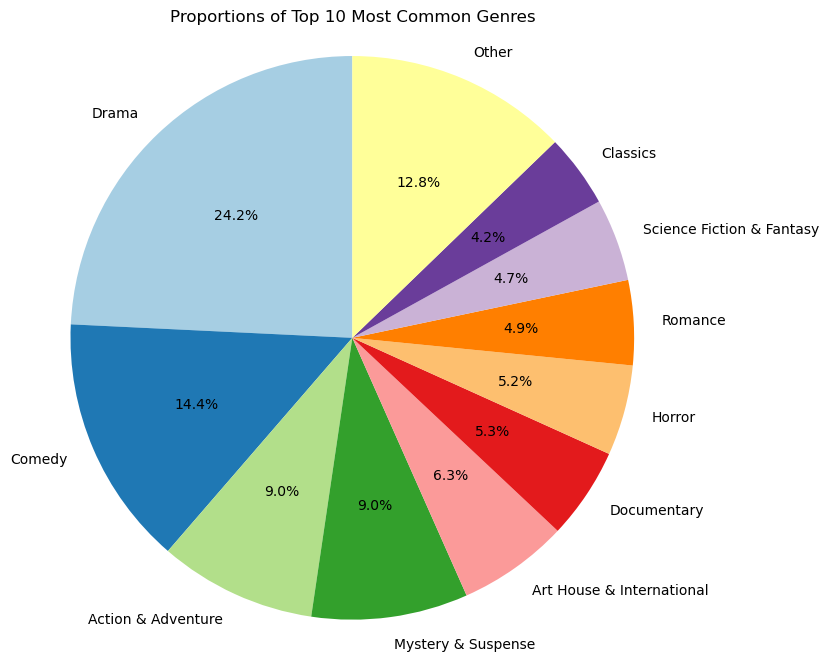

In [366]:
# Top Genres

all_genres = df['genres'].str.split(', ', expand=True).stack().tolist()

genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)

top_genres_names = [genre[0] for genre in top_genres]
top_genres_counts = [genre[1] for genre in top_genres]
other_count = sum([genre[1] for genre in genre_counts.items() if genre[0] not in top_genres_names])

top_genres_names.append('Other')
top_genres_counts.append(other_count)

plt.figure(figsize=(8, 8))
plt.pie(top_genres_counts, labels=top_genres_names, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title("Proportions of Top 10 Most Common Genres")
plt.axis('equal') 

plt.show()


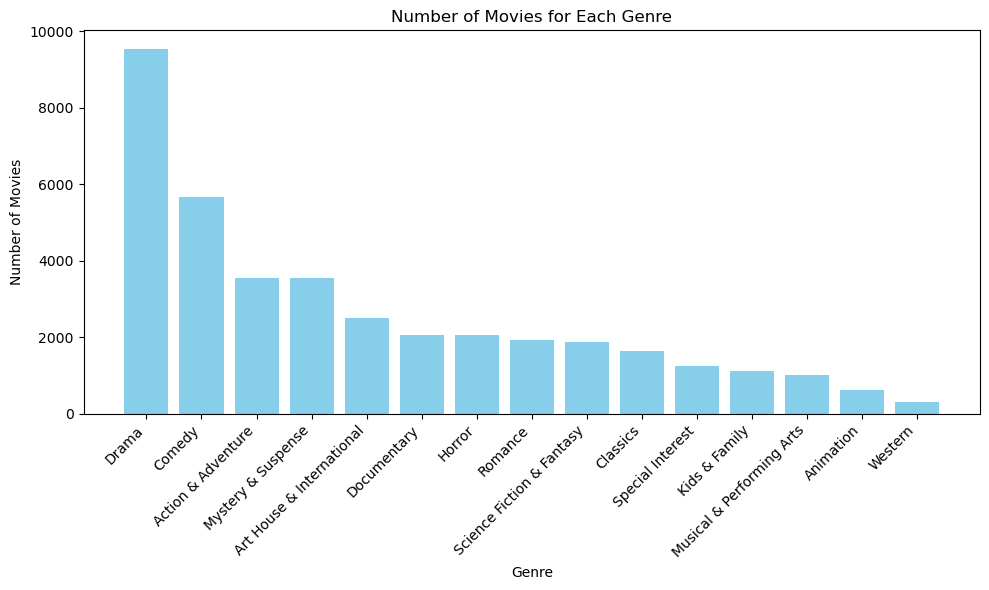

In [367]:
# Number of movies per genre

sorted_genre_counts = genre_counts.most_common()

genres = [genre[0] for genre in sorted_genre_counts]
counts = [genre[1] for genre in sorted_genre_counts]

plt.figure(figsize=(10, 6))
plt.bar(genres[:15], counts[:15], color='skyblue')  # Limiting to top 15 genres for visibility
plt.xticks(rotation=45, ha="right")
plt.title("Number of Movies for Each Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")

# Show the plot
plt.tight_layout()
plt.show()

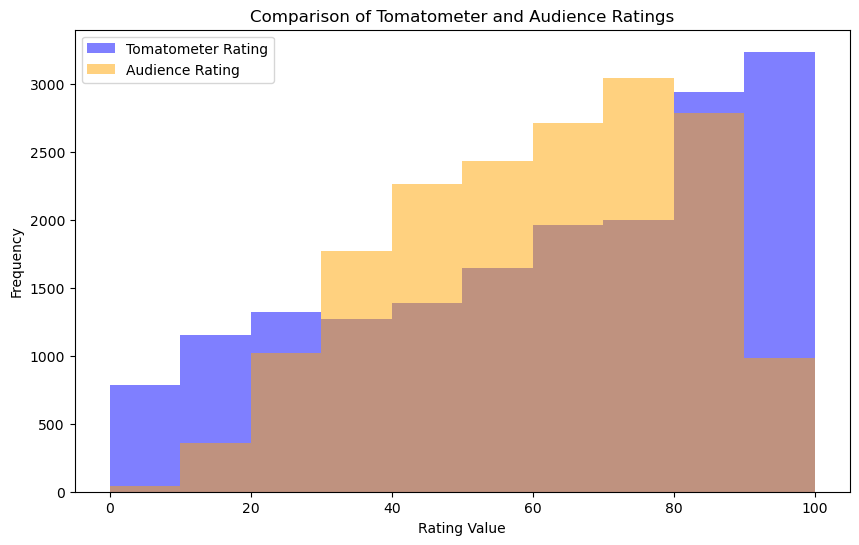

In [430]:
# Comparison of Critic rating vs Audience rating

subset_df = df

plt.figure(figsize=(10, 6))

plt.hist(subset_df['tomatometer_rating'], bins=10, alpha=0.5, label='Tomatometer Rating', color='blue')

plt.hist(subset_df['audience_rating'], bins=10, alpha=0.5, label='Audience Rating', color='orange')

plt.title("Comparison of Tomatometer and Audience Ratings")
plt.xlabel("Rating Value")
plt.ylabel("Frequency")

plt.legend()

plt.show()


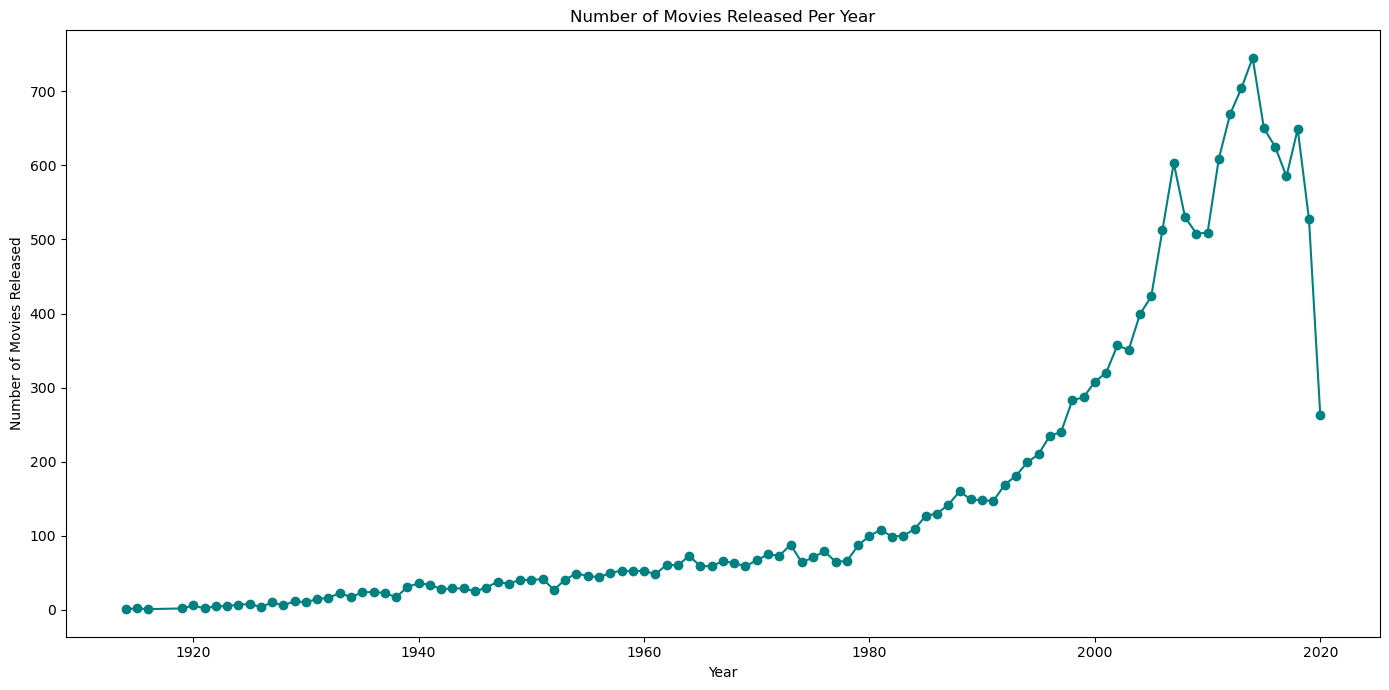

In [434]:
# Number of movies per year

df['release_year'] = df['original_release_date'].dt.year

movies_per_year = df.groupby('release_year').size().reset_index(name='movies_released')

plt.figure(figsize=(14, 7))
plt.plot(movies_per_year['release_year'], movies_per_year['movies_released'], marker='o', color='teal')

plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')

plt.tight_layout()
plt.show()


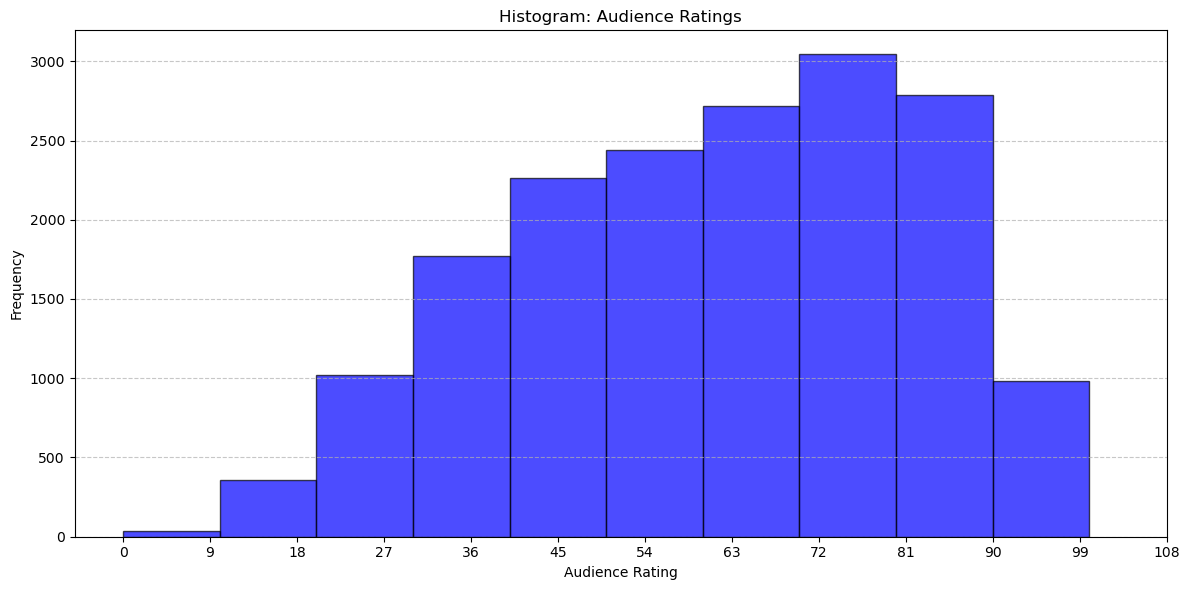

In [442]:
# Audience Ratings
subset_df = df

plt.figure(figsize=(12, 6))

plt.hist(subset_df['audience_rating'], bins=10, edgecolor="black", alpha=0.7, color='blue')
plt.xticks(bins)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Histogram: Audience Ratings")
plt.xlabel("Audience Rating")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
